<a href="https://colab.research.google.com/github/anh-honcharuk/Neural-Networks/blob/main/kr_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense

In [ ]:
df = pd.read_csv('telecom_churn.csv')

1. Вивести зміст перших 5 рядків з файлу telecom_churn.csv.

In [ ]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


2. Вивести розмір даних (кількість рядків і стовбців), назву ознак
та їх типи. Чи є пропуски даний у таблиці? 

---


**Пропусків немає**

---



In [ ]:
print('Кількість рядків\n')
print(df.count())
print('\nКількісь стовбців', len(df.columns))

Кількість рядків

State                     3333
Account length            3333
Area code                 3333
International plan        3333
Voice mail plan           3333
Number vmail messages     3333
Total day minutes         3333
Total day calls           3333
Total day charge          3333
Total eve minutes         3333
Total eve calls           3333
Total eve charge          3333
Total night minutes       3333
Total night calls         3333
Total night charge        3333
Total intl minutes        3333
Total intl calls          3333
Total intl charge         3333
Customer service calls    3333
Churn                     3333
dtype: int64

Кількісь стовбців 20


In [ ]:
print("Назви ознак та їх типи даних\n")
df.dtypes

Назви ознак та їх типи даних



State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object

3. Змінити тип даних для стовпчика Churn на int64.

In [ ]:
df['Churn'] = df['Churn'].astype(int)

State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                       int64
Total charge              float64
dtype: object

4. Виконати сортування по Account length за спаданням.

In [ ]:
df.sort_values(['Account length'], ascending=[False])

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
817,UT,243,510,No,No,0,95.5,92,16.24,163.7,63,13.91,264.2,118,11.89,6.6,6,1.78,2,0
1408,NM,232,408,No,No,0,165.6,104,28.15,195.9,115,16.65,118.3,77,5.32,11.8,3,3.19,1,0
1751,WY,225,415,No,No,0,182.7,142,31.06,246.5,63,20.95,218.0,103,9.81,8.8,2,2.38,1,0
1551,MI,225,415,No,No,0,165.4,106,28.12,273.7,109,23.26,210.0,93,9.45,8.7,3,2.35,0,1
1886,ID,224,510,No,No,0,111.4,133,18.94,175.0,66,14.88,217.2,106,9.77,5.5,6,1.49,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1838,IA,1,408,No,Yes,26,208.0,115,35.36,185.0,113,15.73,177.7,144,8.00,8.1,9,2.19,1,0
2879,SC,1,415,No,Yes,26,146.6,68,24.92,172.8,67,14.69,173.8,113,7.82,10.0,2,2.70,1,0
923,MS,1,415,No,No,0,144.8,107,24.62,112.5,66,9.56,218.7,79,9.84,13.8,3,3.73,1,0
1409,NJ,1,415,No,Yes,30,183.1,95,31.13,232.6,110,19.77,248.3,110,11.17,8.4,2,2.27,0,0


5. Надати відповідь на питання: яка максимальна довжина
міжнародних дзвінків серед лояльних користувачів (Churn ==
0), що не користуються послугою міжнародного роумінгу (
'International plan' == 'No')?

In [ ]:
df[(df['Churn'] == 0) & (df['International plan'] == 'No')]['Total intl minutes'].max()

18.9

6. Порахувати загальну кількість дзвінків (Total day charge, Total
eve charge, Total night charge) для всіх користувачів. Результат
занести у новий стовпчик Total charge.

In [ ]:
df['Total charge'] = df['Total day charge'] + df['Total eve charge'] + df['Total night charge']
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total charge
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,72.86
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,55.54
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,59.00
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,65.02
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,49.36


7. Зробити графічну інтерпретацію попереднього пункту для 10
користувачів за максимальними показниками, що формують
Total charge. Значення Total day charge, Total eve charge,
 Total
night charge, Total charge повинні відображатися графічно.

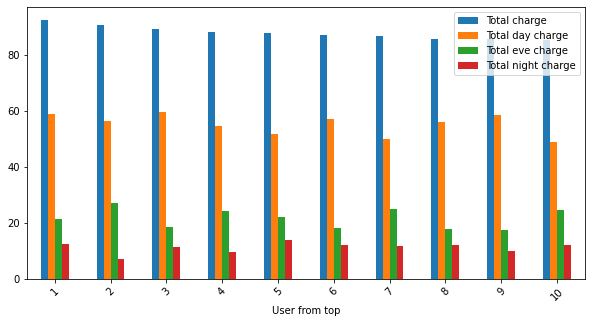

In [ ]:
dt = df.nlargest(10, 'Total charge')
dt['User from top'] = [x for x in range(1, 11)]
dt[['Total charge', 'Total day charge', 'Total eve charge', 'Total night charge', 'User from top']].groupby('User from top').sum().plot(kind='bar', rot=45, figsize=(10,5))

8. Побудувати і вивести графічну інтерпретацію багатошарової
моделі персептрона для бінарної класифікації. Модель повинна
мати 8 входів, 4 прихованих шарів з 15, 10 15 та 20 нейронами
і вихідний шар з 1 виходом. Функції лінійної активації
використовуються в кожному прихованому шарі, а функція
активації сигмоїда використовується в вихідному шарі для
двійковій класифікації.

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 8)]               0         
_________________________________________________________________
dense (Dense)                (None, 15)                135       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                160       
_________________________________________________________________
dense_2 (Dense)              (None, 15)                165       
_________________________________________________________________
dense_3 (Dense)              (None, 20)                320       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 21        
Total params: 801
Trainable params: 801
Non-trainable params: 0
________________________________________________________

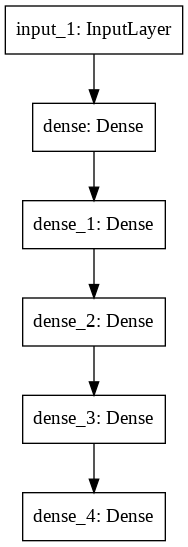

In [ ]:
activ = 'linear'
visible = Input(shape=(8,))
hidden1 = Dense(15, activation=activ)(visible)
hidden2 = Dense(10, activation=activ)(hidden1)
hidden3 = Dense(15, activation=activ)(hidden2)
hidden4 = Dense(20, activation=activ)(hidden3)
output = Dense(1,activation='sigmoid')(hidden4)
model = Model(inputs=visible, outputs=output)
print(model.summary())
plot_model(model)